## Data Handling & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
from shapely.geometry import box
import geopandas as gpd
import plotly.express as px
import geodatasets
from matplotlib.colors import ListedColormap, Normalize
from statsmodels.tsa.stattools import grangercausalitytests, ccf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from data_preprocessing import * 


c:\Users\olenk\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#### Introduction

In the first part of this notebook, we aim to explore the dataset we will be working with. We will conduct basic exploratory data analysis (EDA), focusing on identifying missing data, determining key features relevant to our problem, and understanding how to merge two datasets: NOAA_StormsEvents (weather conditions) and eaglei_data (power outages).

## NOAA_StormsEvents Data Analysis

### Data Description  

The table below provides a detailed description of the columns in the **NOAA_StormsEvents** dataset.  

| Column Name            | Description |
|------------------------|-------------|
| **BEGIN_YEARMONTH**    | Year and month when the event began (e.g., 201401 for January 2014). |
| **BEGIN_DAY**          | Day of the month when the event started. |
| **BEGIN_TIME**         | Time when the event started, in HHMM format (e.g., 1530 for 3:30 PM). |
| **END_YEARMONTH**      | Year and month when the event ended. |
| **END_DAY**           | Day of the month when the event ended. |
| **END_TIME**          | Time when the event ended, in HHMM format. |
| **EPISODE_ID**        | Unique identifier for a specific weather episode. |
| **EVENT_ID**          | Unique identifier for a specific event within an episode. |
| **STATE**             | Name of the state where the event occurred. |
| **STATE_FIPS**        | FIPS (Federal Information Processing Standard) code for the state. |
| **YEAR**              | Year when the event took place. |
| **MONTH_NAME**        | Name of the month when the event occurred (e.g., "January"). |
| **EVENT_TYPE**        | Type of weather event (e.g., tornado, thunderstorm, flood). |
| **CZ_TYPE**          | Type of area where the event occurred (C = County, Z = Weather Zone). |
| **CZ_FIPS**          | FIPS code for the county or weather zone. |
| **CZ_NAME**          | Name of the county or weather zone. |
| **WFO**              | Code of the Weather Forecast Office (WFO) that reported the event. |
| **BEGIN_DATE_TIME**   | Date and time when the event began. |
| **CZ_TIMEZONE**      | Time zone of the affected area. |
| **END_DATE_TIME**     | Date and time when the event ended. |
| **INJURIES_DIRECT**   | Number of direct injuries caused by the event. |
| **INJURIES_INDIRECT** | Number of indirect injuries related to the event (e.g., traffic accidents caused by weather conditions). |
| **DEATHS_DIRECT**     | Number of direct fatalities caused by the event. |
| **DEATHS_INDIRECT**   | Number of indirect fatalities related to the event. |
| **DAMAGE_PROPERTY**   | Estimated property damage caused by the event. |
| **DAMAGE_CROPS**      | Estimated crop damage caused by the event. |
| **SOURCE**            | Source of information about the event (e.g., weather observer, media, government reports). |
| **MAGNITUDE**         | Measurement of event intensity (e.g., wind speed, wave height, hail size). |
| **MAGNITUDE_TYPE**    | Unit of measurement for event intensity (e.g., MPH – miles per hour). |
| **FLOOD_CAUSE**       | Cause of flooding, if applicable (e.g., heavy rainfall, snowmelt). |
| **CATEGORY**         | Event category (applicable to hurricanes, for example). |
| **TOR_F_SCALE**       | Fujita scale rating for tornadoes (F0–F5, indicating tornado intensity). |
| **TOR_LENGTH**        | Tornado path length in miles. |
| **TOR_WIDTH**         | Tornado path width in yards. |
| **TOR_OTHER_WFO**     | Code of another Weather Forecast Office responsible for an affected area. |
| **TOR_OTHER_CZ_STATE**| State code where the tornado moved. |
| **TOR_OTHER_CZ_FIPS** | FIPS code of the county or weather zone where the tornado moved. |
| **TOR_OTHER_CZ_NAME** | Name of the county or weather zone where the tornado moved. |
| **BEGIN_RANGE**       | Distance from a reference point to the event's starting location. |
| **BEGIN_AZIMUTH**     | Azimuth (direction) of the event's starting location relative to a reference point. |
| **BEGIN_LOCATION**    | Name of the location where the event began. |
| **END_RANGE**        | Distance from a reference point to the event's ending location. |
| **END_AZIMUTH**      | Azimuth (direction) of the event's ending location relative to a reference point. |
| **END_LOCATION**      | Name of the location where the event ended. |
| **BEGIN_LAT**         | Latitude of the event's starting location. |
| **BEGIN_LON**         | Longitude of the event's starting location. |
| **END_LAT**           | Latitude of the event's ending location. |
| **END_LON**           | Longitude of the event's ending location. |
| **EPISODE_NARRATIVE** | Description of the entire weather episode. |
| **EVENT_NARRATIVE**   | Description of a specific event within the episode. |
| **DATA_SOURCE**       | Source of meteorological data. |


#### Data Loading

In [2]:
stormEvents_2014 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2014_c20231116.csv")
stormEvents_2015 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2015_c20240716.csv")
stormEvents_2016 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2016_c20220719.csv")
stormEvents_2017 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2017_c20230317.csv")
stormEvents_2018 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2018_c20240716.csv")
stormEvents_2019 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2019_c20240117.csv")
stormEvents_2020 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2020_c20240620.csv")
stormEvents_2021 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2021_c20240716.csv")
stormEvents_2022 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2022_c20241121.csv")
stormEvents_2023 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2023_c20241216.csv")
stormEvents_2024 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2024_c20241216.csv")

#### EVENT_TYPE Analysis

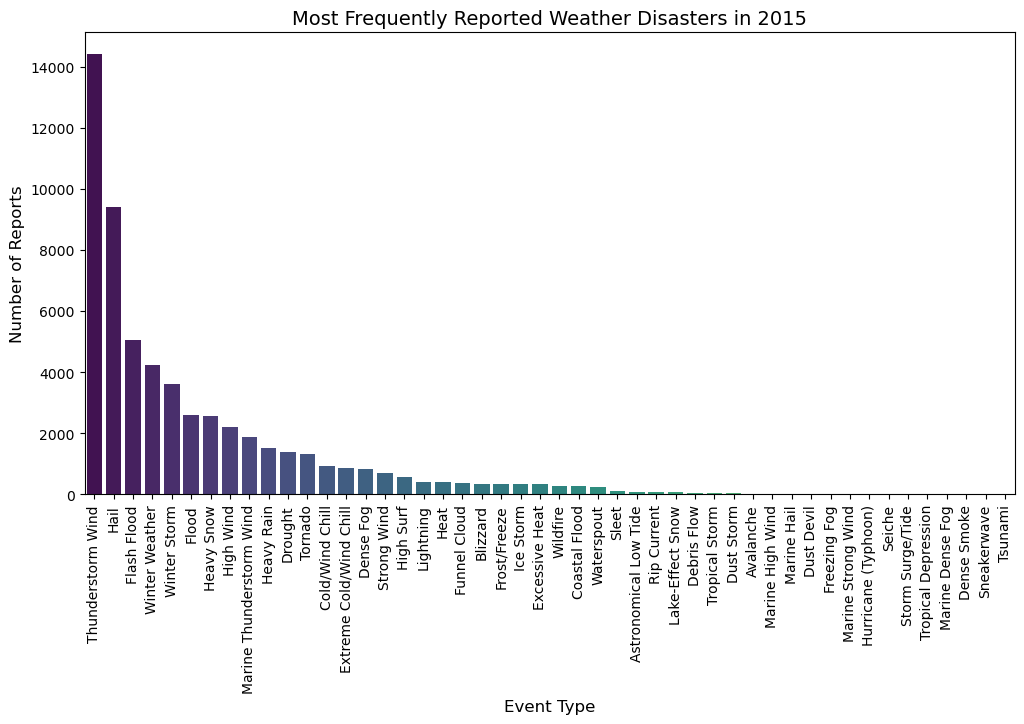

In [3]:
plot_event_counts(stormEvents_2015)

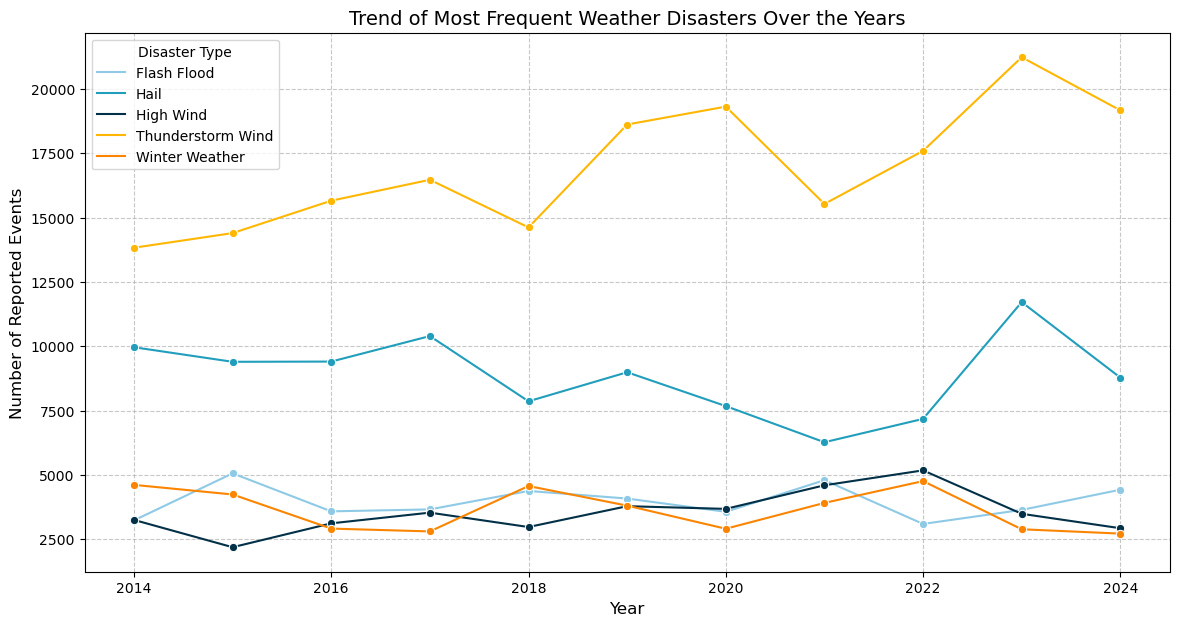

In [3]:
dfs = [stormEvents_2014, stormEvents_2015, stormEvents_2016, stormEvents_2017, stormEvents_2018,
       stormEvents_2019, stormEvents_2020, stormEvents_2021, stormEvents_2022, stormEvents_2023,
       stormEvents_2024]
plot_event_trends(dfs)


After analyzing the number of reports from each type, it can be observed that the most frequently reported events are Thunderstorm Wind, Hail, and Flash Flood, and this trend has not changed significantly over the years. In the next section, we will take a closer look at this data in more detail.

<Figure size 1200x600 with 0 Axes>

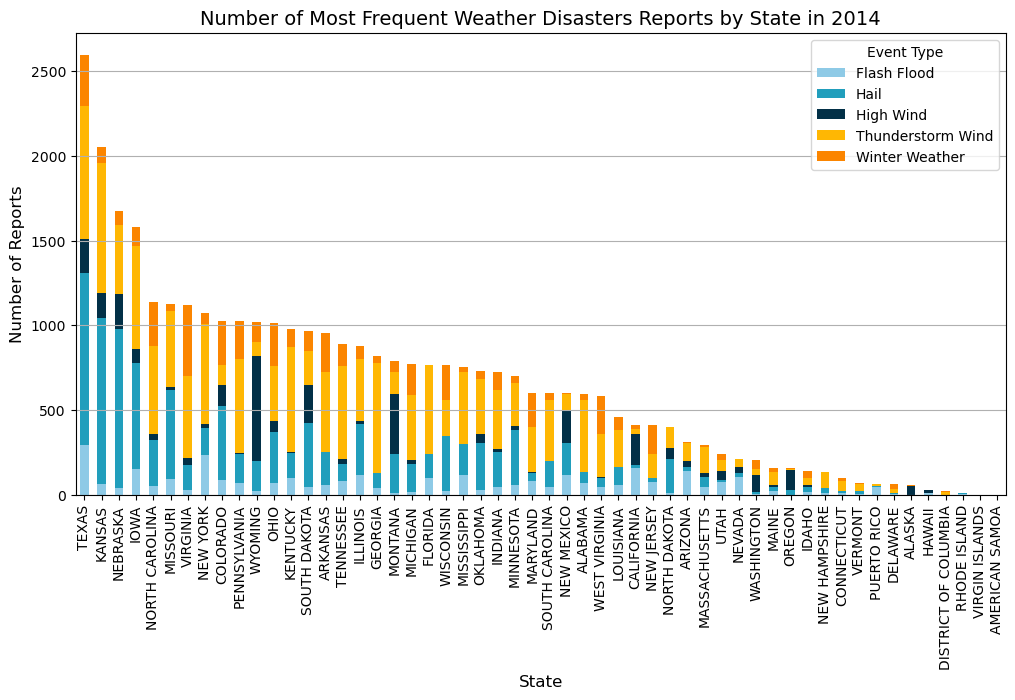

In [5]:
plot_state_event_counts(stormEvents_2014)

<Figure size 1200x600 with 0 Axes>

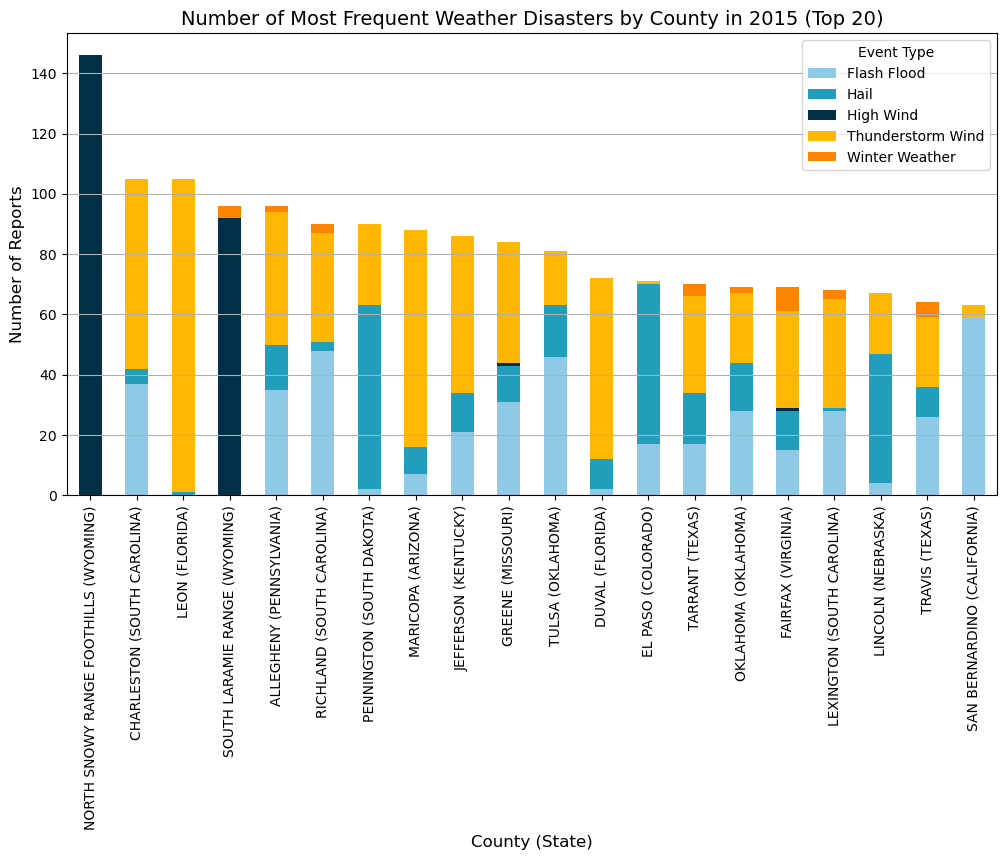

In [6]:
plot_county_event_counts(stormEvents_2015)

### Seasonality of Storm Events Analysis
The next element to be analyzed will be the seasonality of weather-related disasters. We will try to find correlations between the season of the year and the intensity of events, to determine whether time will be a significant feature for modeling.

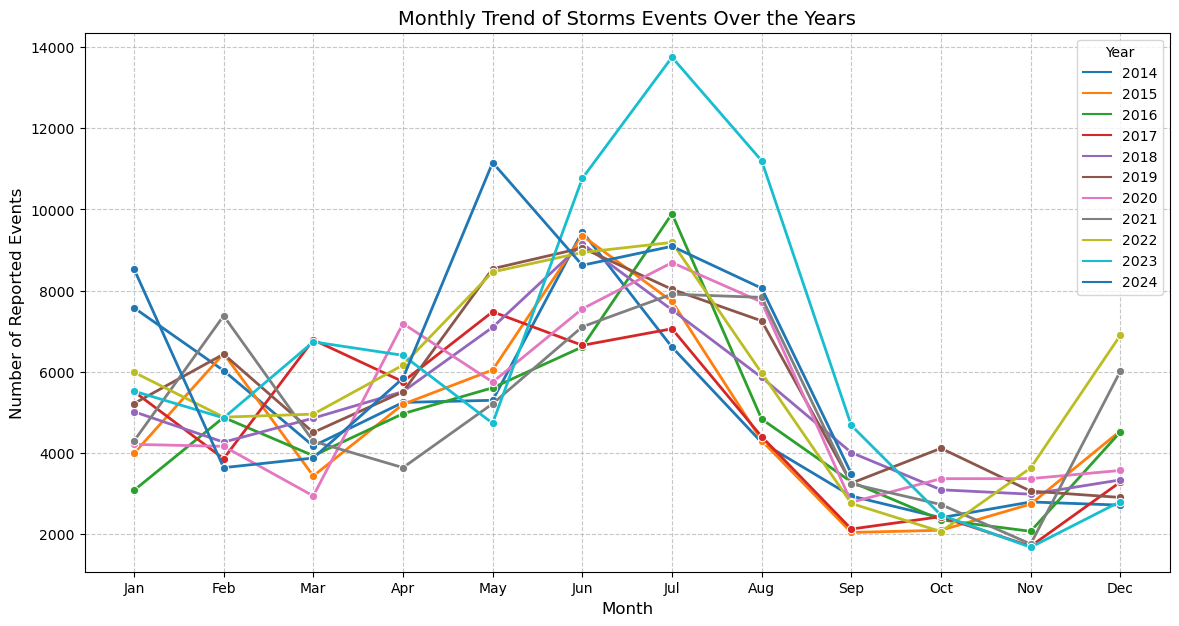

In [7]:
plot_monthly_event_trends(dfs)

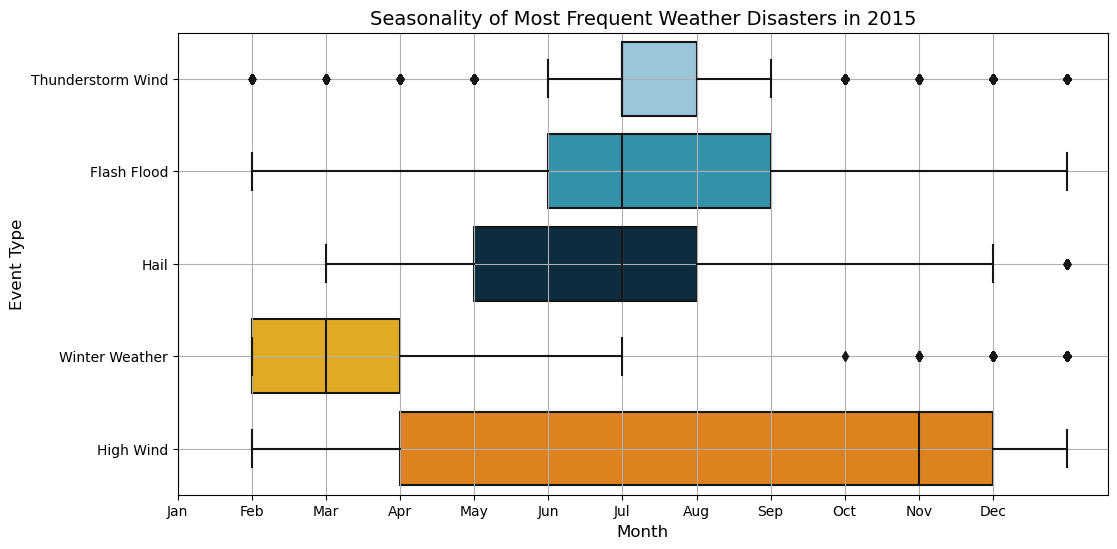

In [7]:
plot_state_event_seasonality(stormEvents_2015)

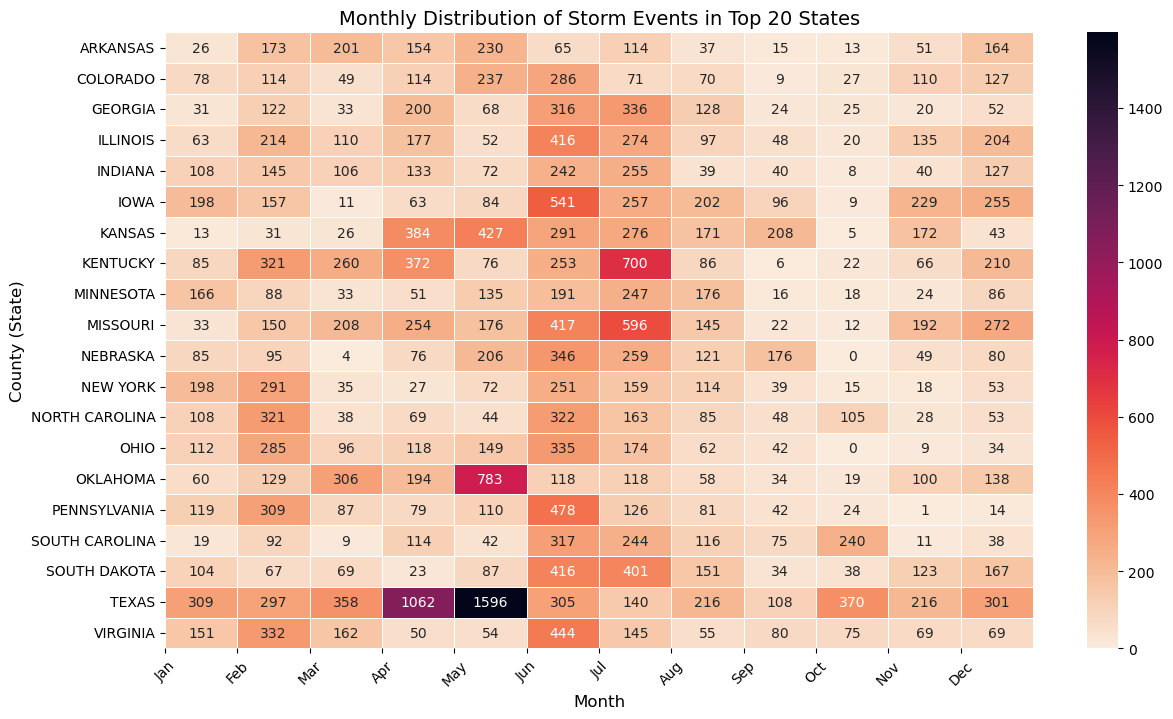

In [4]:
plot_event_heatmap(stormEvents_2015)

The above visualizations indicate that the season affects the frequency of storm events. We can observe a higher number of occurrences, particularly during the summer season (June/July/August).

### DAMAGE_PROPERTY and DAMAGE_CROPS Analysis

In this section, we will analyze how storm events have impacted property and crop damages.  
In the next part, we will explore whether there is a relationship between reported damages and power outages.

In [4]:
stormEvents_2015['DAMAGE_PROPERTY'] = stormEvents_2015['DAMAGE_PROPERTY'].apply(convert_damage)
stormEvents_2015['DAMAGE_CROPS'] = stormEvents_2015['DAMAGE_CROPS'].apply(convert_damage)
stormEvents_2015['MAGNITUDE'] = stormEvents_2015['MAGNITUDE'].replace('', 0).fillna(0) 


for i, df in enumerate(dfs):
    df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage)
    df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].apply(convert_damage)
    df['MAGNITUDE'] = df['MAGNITUDE'].replace('', 0).fillna(0)


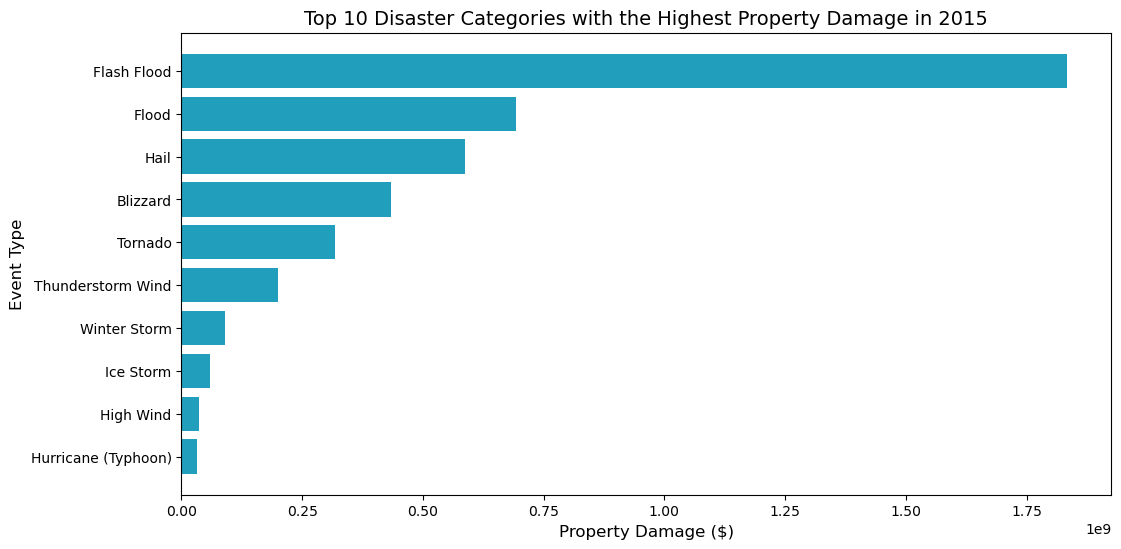

In [5]:
plot_top_damage_events(stormEvents_2015, damage_type='DAMAGE_PROPERTY')

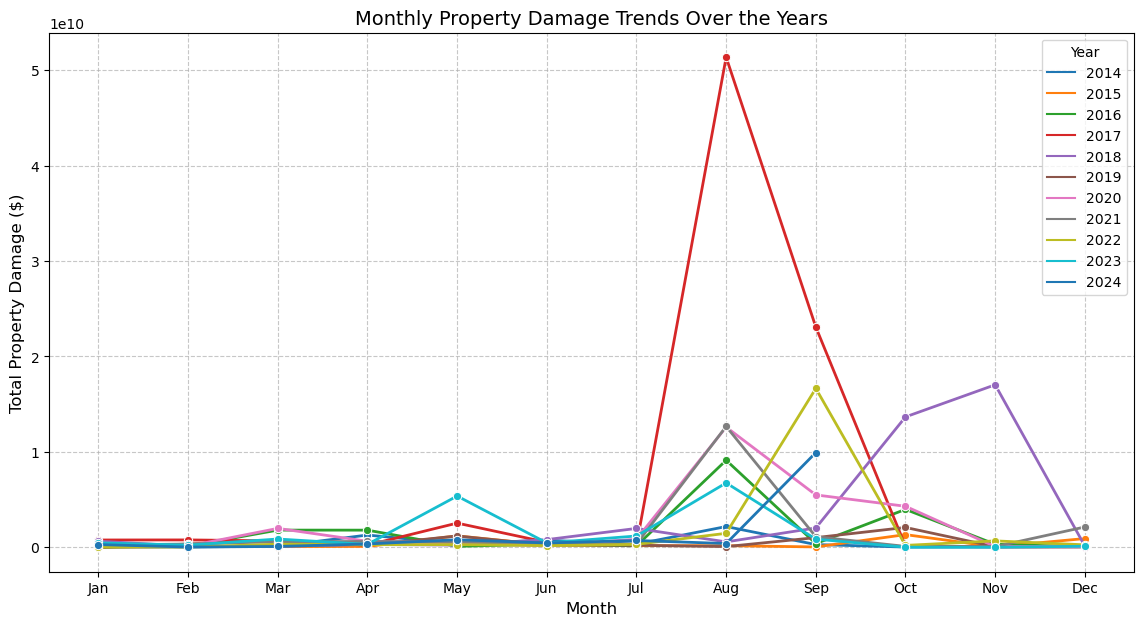

In [6]:
plot_monthly_damage(dfs, damage_type='DAMAGE_PROPERTY')

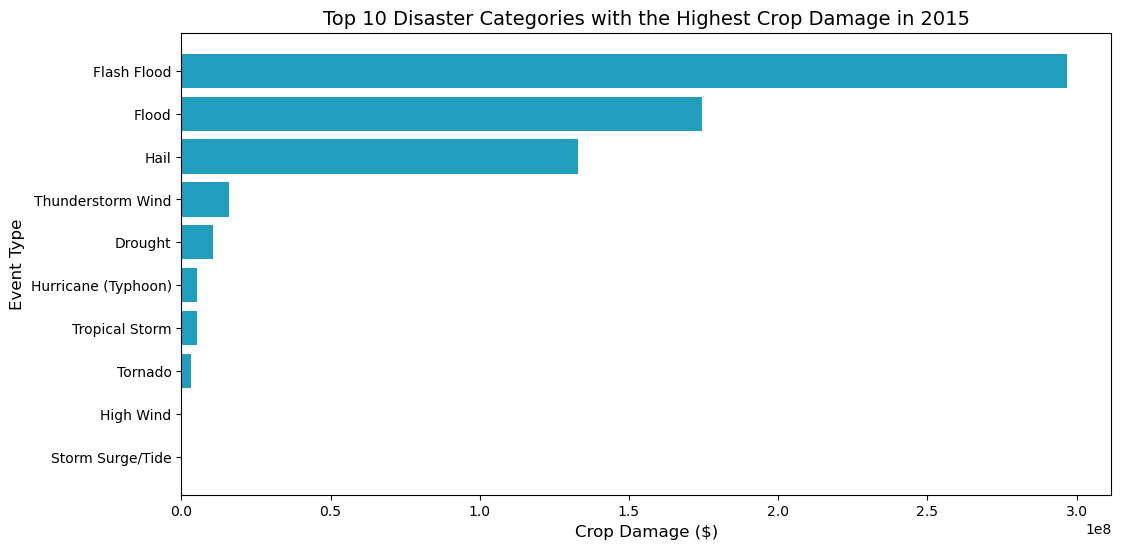

In [7]:
plot_top_damage_events(stormEvents_2015, damage_type='DAMAGE_CROPS')

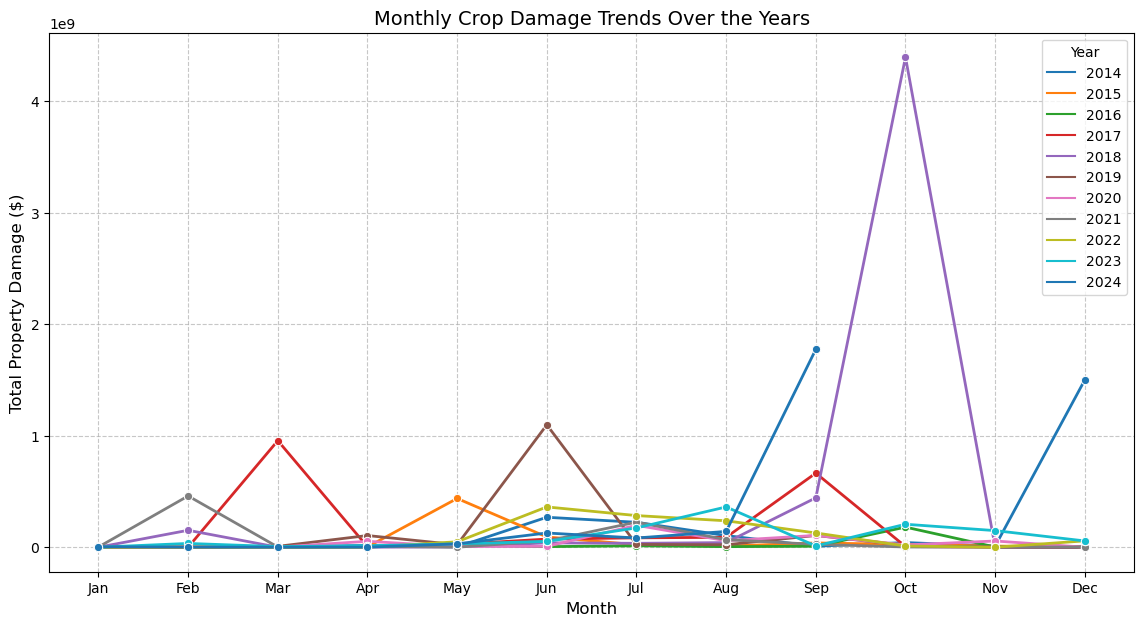

In [8]:
plot_monthly_damage(dfs, damage_type='DAMAGE_CROPS')

Damage in Property mostly correlates with the intensity of storm event occurrences, with the largest losses being recorded in August and September. Damage in Crops has a more even distribution throughout the year, with the highest losses occurring in March, June, and October.

# ------------------------ STOP ----------------------------

In [7]:
data_files = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
data_files

fips_code      county      state  customers_out       run_start_time
0             1037       Coosa    Alabama             12  2014-11-01 04:00:00
1             1051      Elmore    Alabama              7  2014-11-01 04:00:00
2             1109        Pike    Alabama              1  2014-11-01 04:00:00
3             1121   Talladega    Alabama             31  2014-11-01 04:00:00
4             4017      Navajo    Arizona              1  2014-11-01 04:00:00
...            ...         ...        ...            ...                  ...
1689455      55029        Door  Wisconsin              1  2014-12-31 00:00:00
1689456      55079   Milwaukee  Wisconsin              1  2014-12-31 00:00:00
1689457      55093      Pierce  Wisconsin              6  2014-12-31 00:00:00
1689458      55125       Vilas  Wisconsin              6  2014-12-31 00:00:00
1689459      55131  Washington  Wisconsin              1  2014-12-31 00:00:00

[1689460 rows x 5 columns]

In [45]:
def analyze_and_visualize(file):
    df = pd.read_csv(file, parse_dates=["run_start_time"])
    df = df.sort_values(["fips_code", "run_start_time"])  # Sortowanie danych
    
    # 1. Mapa braków danych (liczba zapisanych wartości na hrabstwo)
    fips_counts = df["fips_code"].value_counts()
    missing_fips = all_fips - set(df["fips_code"])  # Hrabstwa, które nie mają danych
    
    plt.figure(figsize=(10, 5))
    sns.histplot(fips_counts, bins=50, kde=True)
    plt.xlabel("Liczba zapisów na hrabstwo")
    plt.ylabel("Liczba hrabstw")
    plt.title("Rozkład liczby zapisów w hrabstwach")
    plt.show()
    
    print(f"Liczba hrabstw bez danych: {len(missing_fips)}")
    
    # 2. Histogram długości przerw w dostawie prądu
    df["Outage_Duration"] = df.groupby("fips_code")["run_start_time"].diff().dt.total_seconds() / 60
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Outage_Duration"].dropna(), bins=50, kde=True)
    plt.xlabel("Czas między zapisami (minuty)")
    plt.ylabel("Liczba wystąpień")
    plt.title("Rozkład przerw w dostawie prądu")
    plt.xlim(0, 500)
    plt.show()
    
    # 3. Wykres czasowy liczby klientów bez prądu
    df_time = df.groupby("run_start_time")["customers_out"].sum()
    plt.figure(figsize=(12, 5))
    df_time.plot()
    plt.xlabel("Czas")
    plt.ylabel("Liczba klientów bez prądu")
    plt.title("Liczba klientów bez prądu w czasie")
    plt.show()


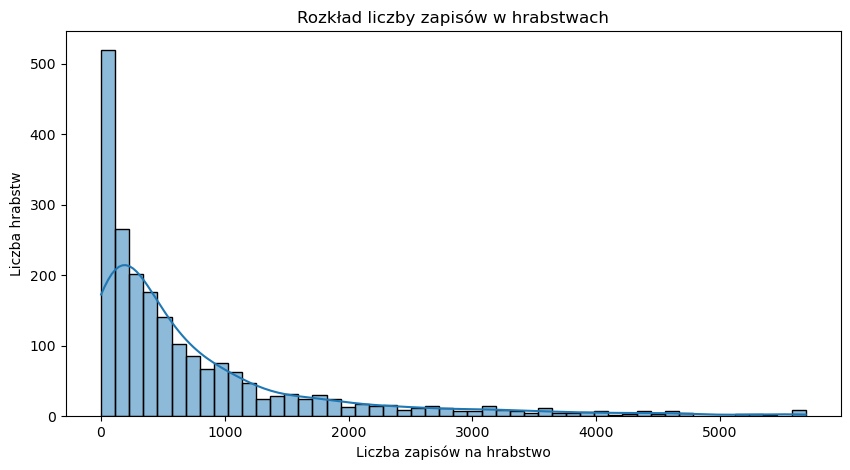

Liczba hrabstw bez danych: 3234


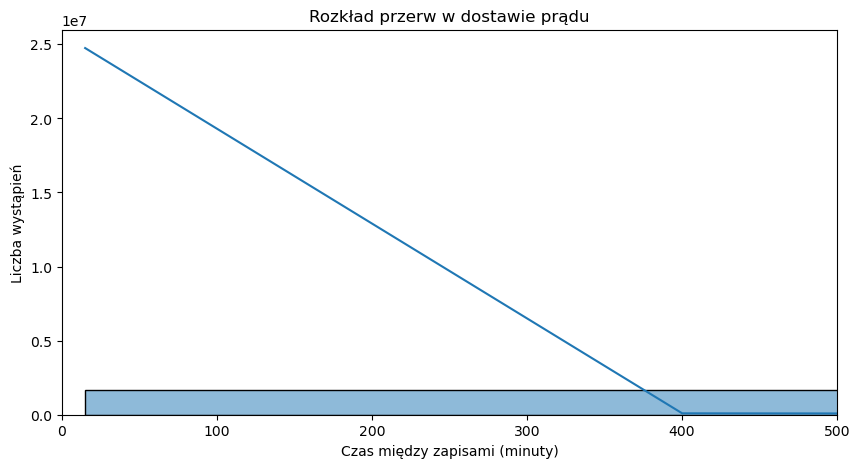

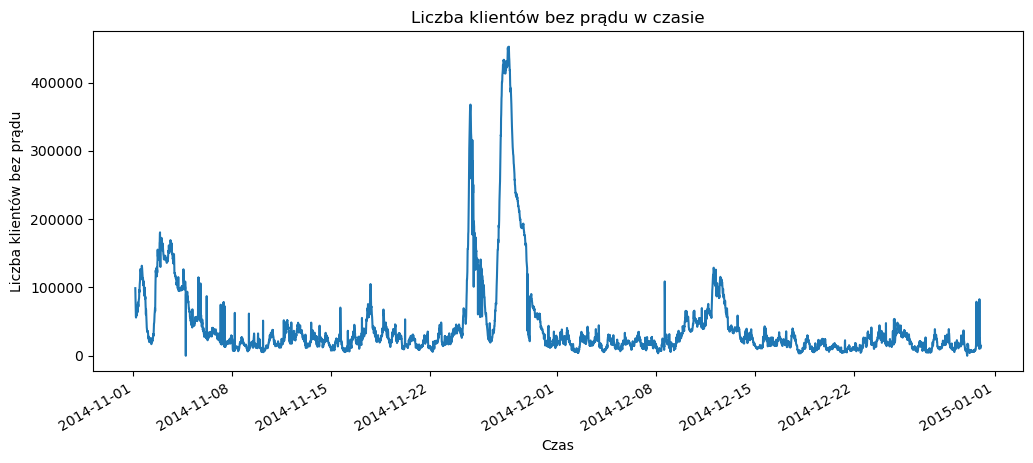

In [47]:
data_files = glob.glob("../data/eaglei_data/eaglei_outages_*.csv")
mcc = pd.read_csv("../data/eaglei_data/MCC.csv")
all_fips = set(mcc["County_FIPS"]) 

analyze_and_visualize(data_files[0])


## Modeled county customers
* County_FIPS - If a FIPS code is missing from this list, we are missing information in EAGLE-I for utilities that have customers in this county.
* Customers: The modelled result for the number of electric utility customers living in this county


In [ ]:
# Load the dataset
df_MCC = pd.read_csv('../data/eaglei_data/MCC.csv')
df_MCC

There are 3244 counties and county equivalents in.

# Eaglei_outages_

## Missing counties

In [ ]:
def countyCountBarPlots(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_data = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"File {file_name} doesn't exist!")
            continue

        df_power = pd.read_csv(file_path)

        unique_fips = (
            df_power.groupby('state')['fips_code']
            .nunique()
            .reset_index()
            .sort_values(by='fips_code')
        )

        plt.figure(figsize=(10, 8))
        plt.barh(unique_fips['state'], unique_fips['fips_code'], color='skyblue')
        plt.xlabel('Nr of counties')
        plt.ylabel('State')
        plt.title(f'Nr of counties per state with power_outages data in {year}')
        plt.tight_layout()
        plt.show()
        unique_fips = unique_fips.rename(columns={'fips_code': year})


        if combined_data.empty:
            combined_data = unique_fips
        else:
            combined_data = pd.merge(combined_data, unique_fips, on='state', how='outer')

 
    states = combined_data['state']


    y_indexes = np.arange(len(states)) 
    height = 0.9 / len(years) 

    plt.figure(figsize=(15, 3*len(years)))

    for i, year in enumerate(years):
        plt.barh(y_indexes + i * height, combined_data[year], height=height, label=str(year))

    plt.ylabel("State", fontsize=12)
    plt.xlabel("Nr of counties", fontsize=12)
    plt.title(f"Nr of counties per state with power_outages data in consecutive years: ({year_start}, {year_end})", fontsize=16)
    plt.yticks(y_indexes + (len(years) - 1) * height / 2, states)
    plt.legend(title="Year", fontsize=10)

    plt.tight_layout()
    plt.show()
    

    


eaglei_outages_2014.csv


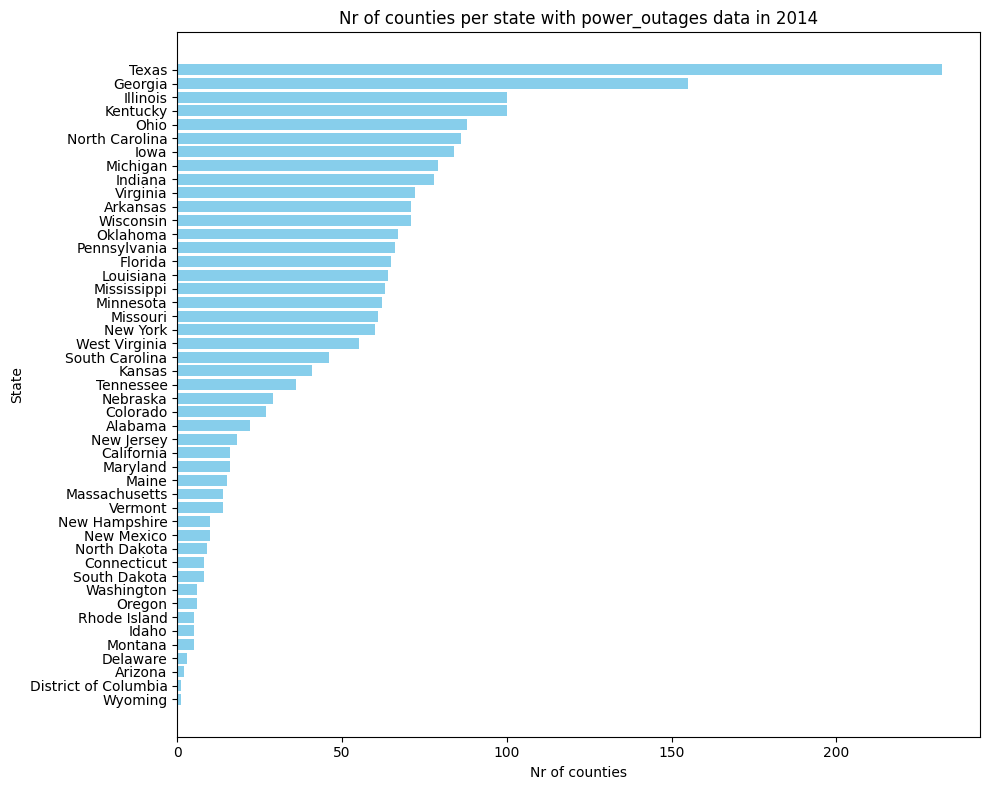

Index(['state', 2014], dtype='object')
eaglei_outages_2015.csv


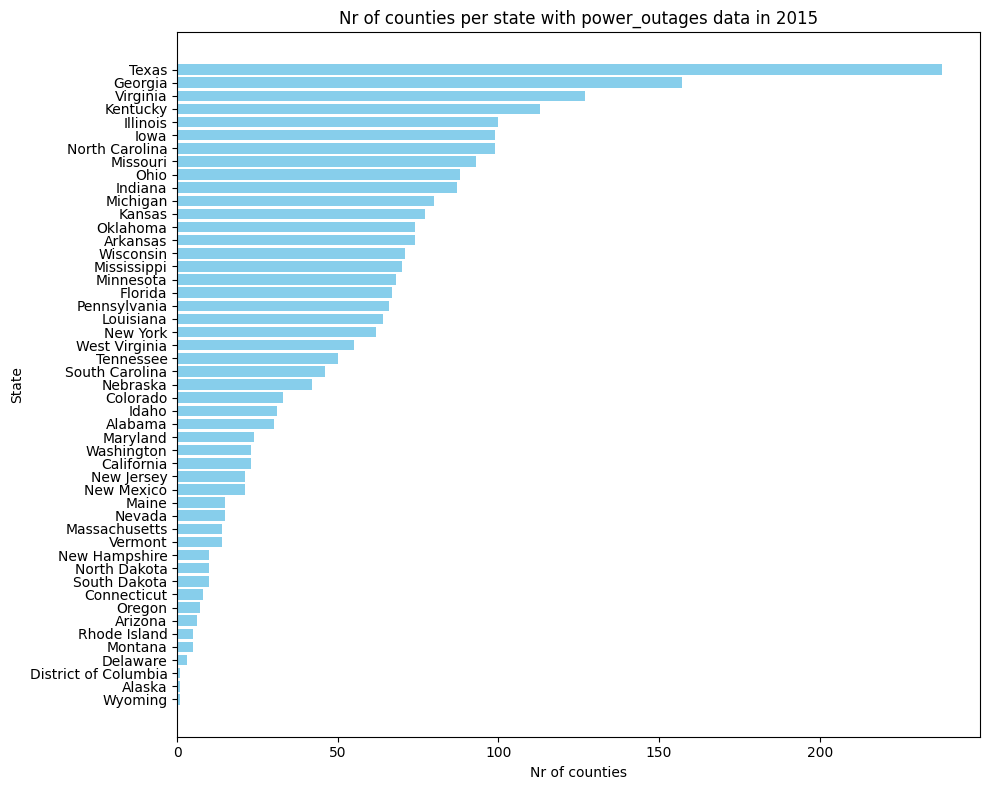

Index(['state', 2015], dtype='object')
eaglei_outages_2016.csv


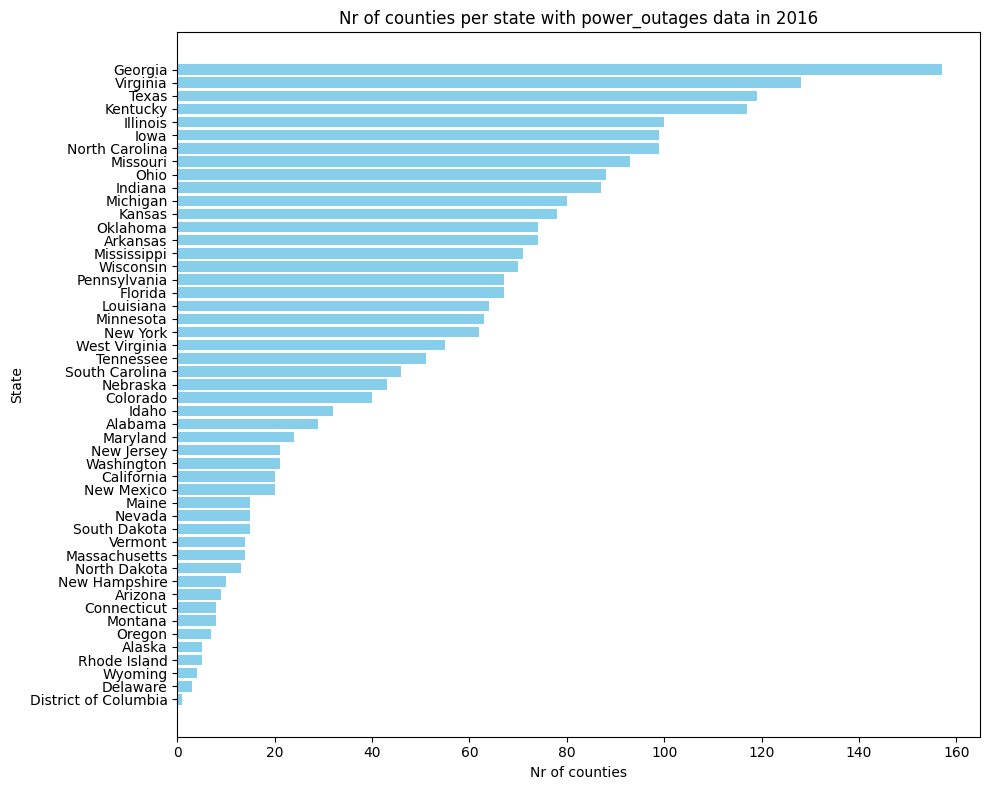

Index(['state', 2016], dtype='object')
eaglei_outages_2017.csv


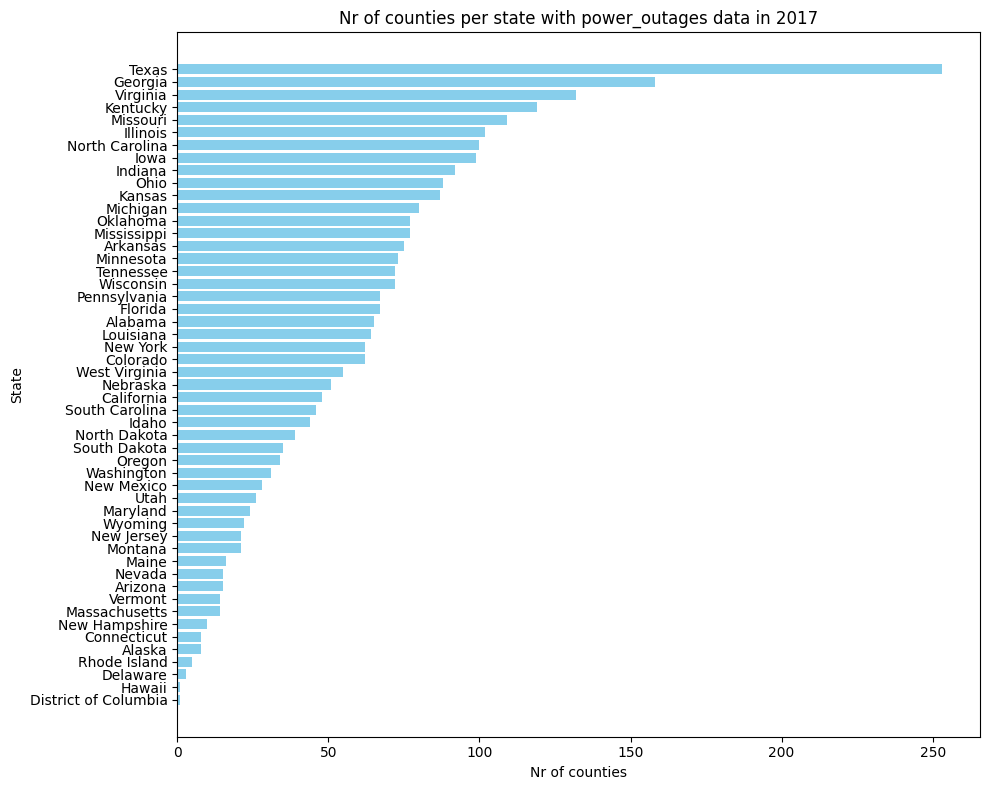

Index(['state', 2017], dtype='object')
eaglei_outages_2018.csv


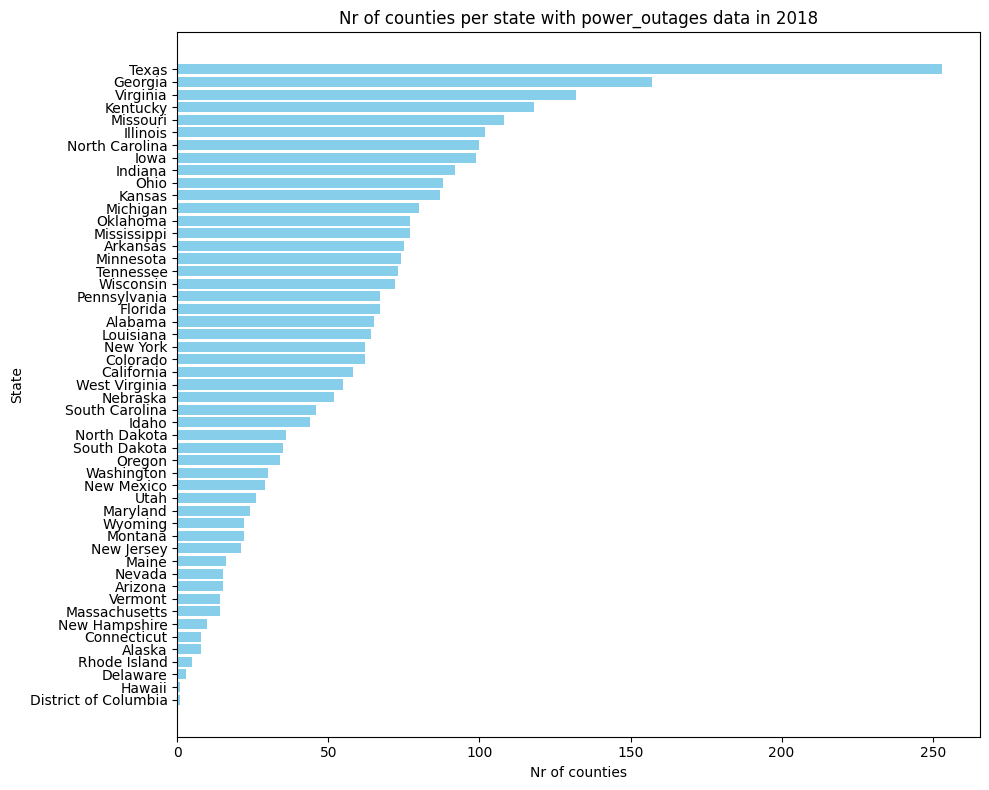

Index(['state', 2018], dtype='object')
eaglei_outages_2019.csv


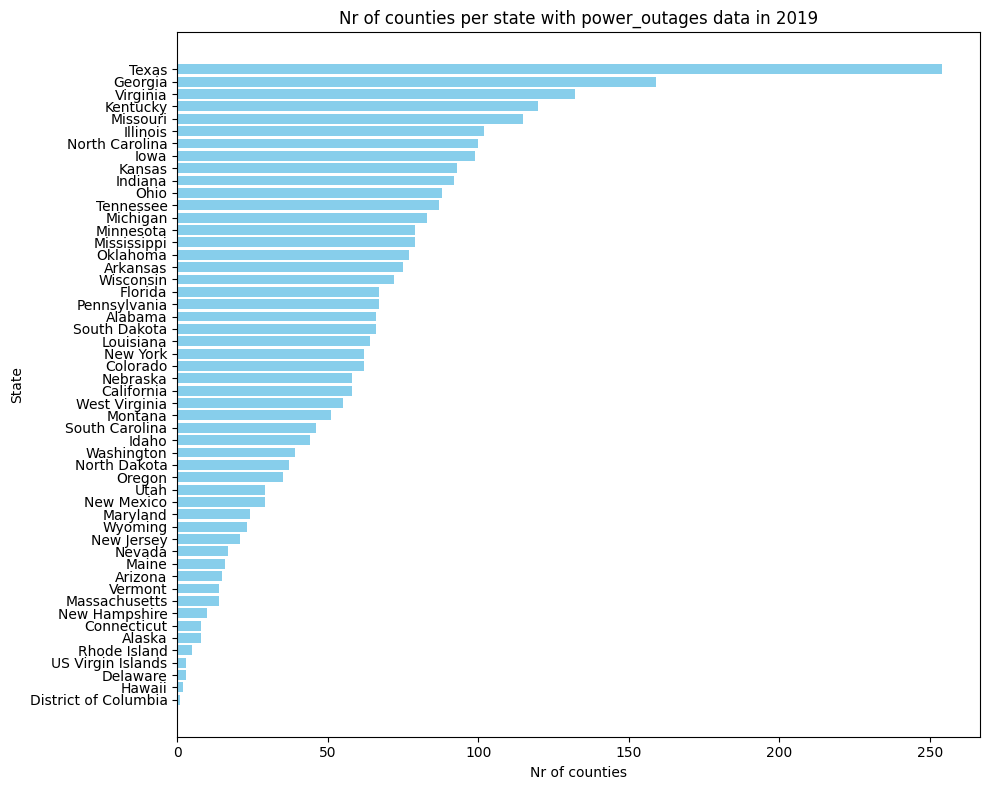

Index(['state', 2019], dtype='object')
eaglei_outages_2020.csv


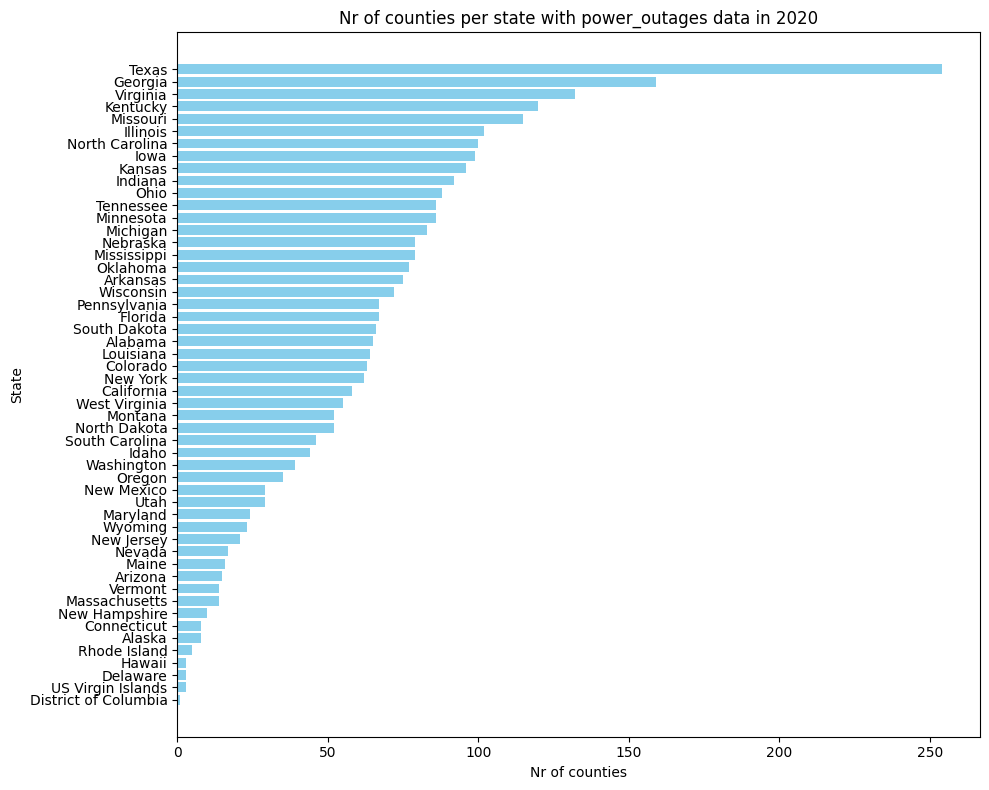

Index(['state', 2020], dtype='object')
eaglei_outages_2021.csv


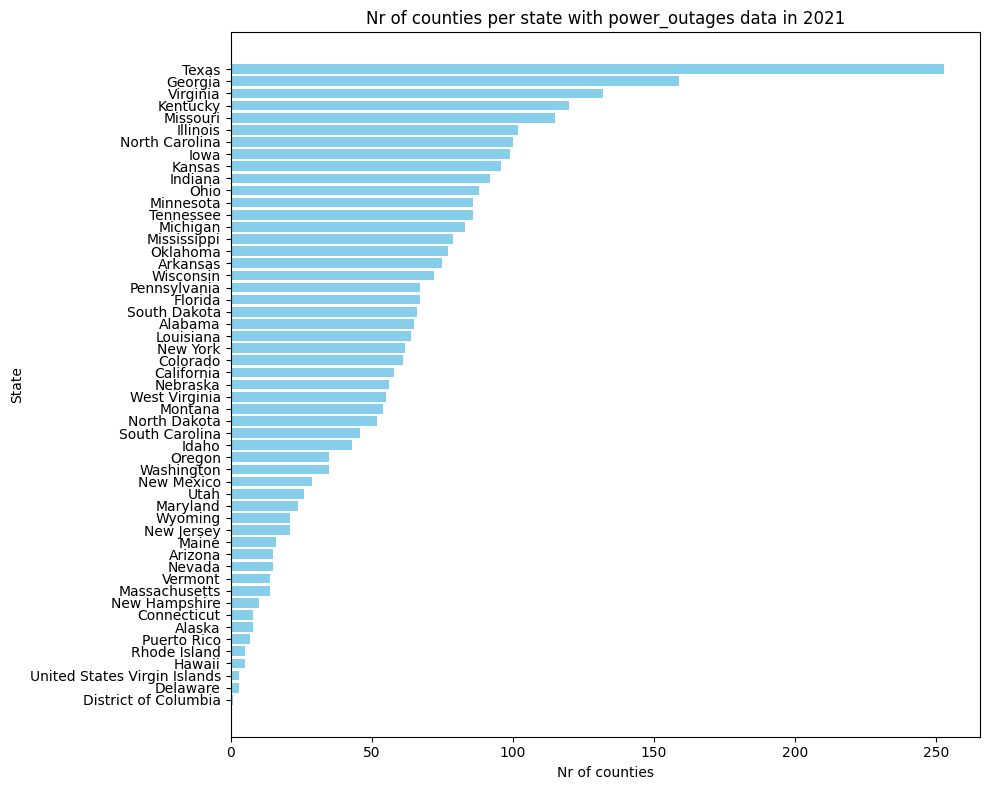

Index(['state', 2021], dtype='object')
eaglei_outages_2022.csv


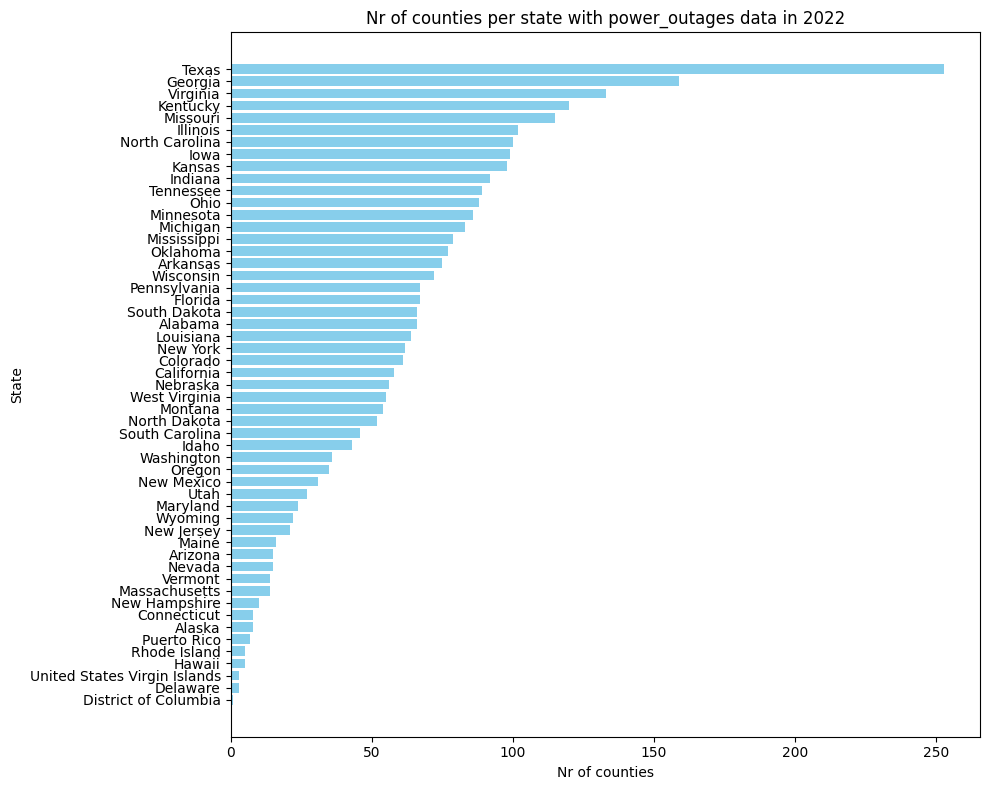

Index(['state', 2022], dtype='object')
eaglei_outages_2023.csv


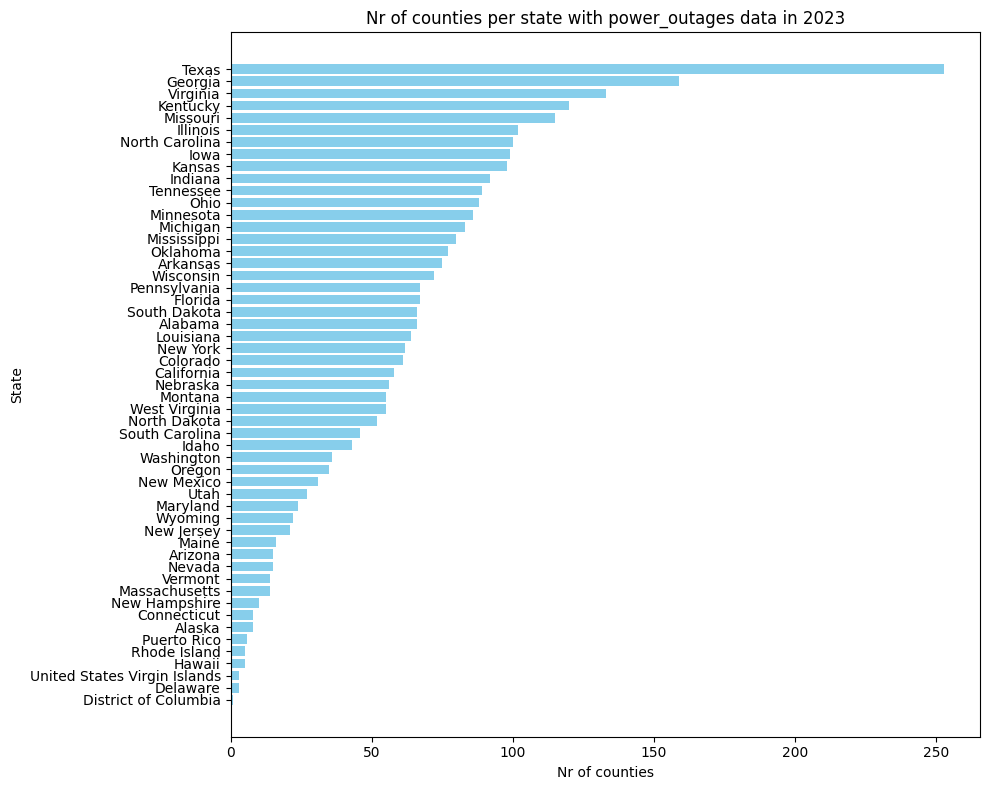

Index(['state', 2023], dtype='object')


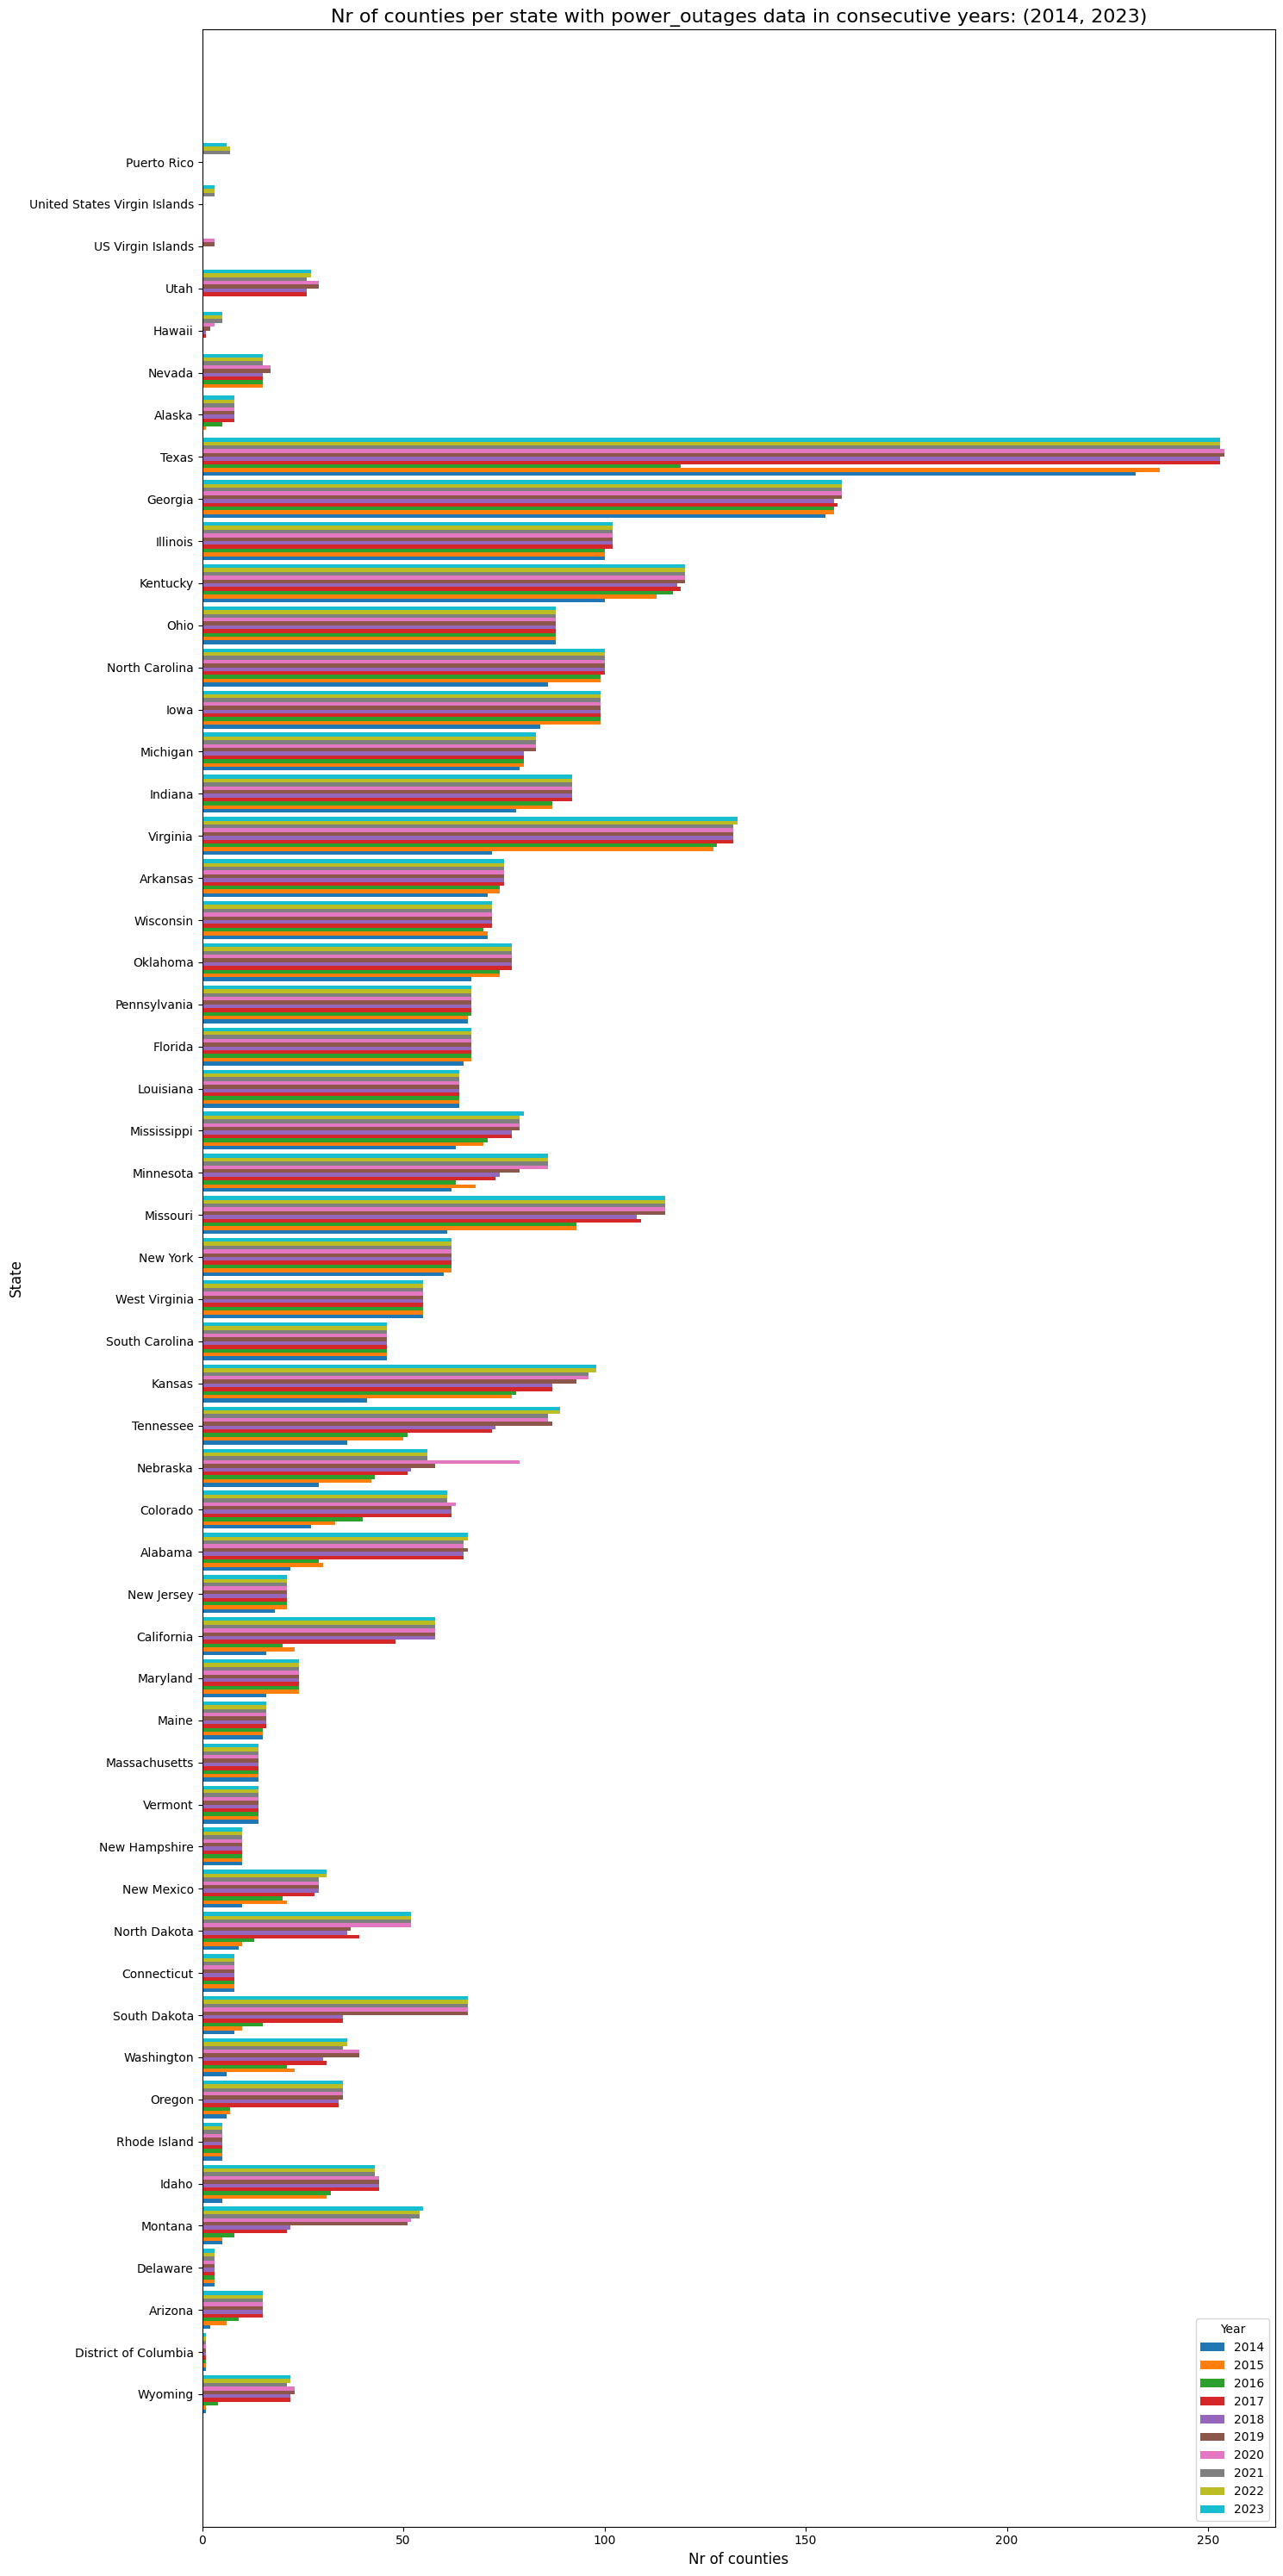

In [118]:
countyCountBarPlots(2014,2023)

In [27]:
def missingCountyMap(year):
    
    shapefile_path = "../data/US_county/tl_2024_us_county.shp"
    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)
    

    data_folder = '../data/eaglei_data/'

    file_name = f'eaglei_outages_{year}.csv'
    file_path = os.path.join(data_folder, file_name)
    print(file_name)
    if not os.path.exists(file_path):
        print(f"File {file_name} doesn't exist!")
        return

    df_power = pd.read_csv(file_path)

    df_power['fips_code'] = df_power['fips_code'].astype(str).str.zfill(5)
    fips_codes = df_power.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})
    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    merged['Data'] = merged['FIPS'].apply(lambda x: 0 if pd.isna(x) else 1)

    us_bounds = box(-125, 24, -66, 50)
    mainland_us = merged[merged.geometry.intersects(us_bounds)]

    nan_counties = mainland_us[mainland_us['FIPS'].isna()]
    non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    nan_counties.plot(ax=ax, color="black", edgecolor="black", label="No data")


    non_nan_counties.plot(ax=ax, color="white", edgecolor="grey", label="Recorded data")
    # non_nan_counties.plot(column='Data', ax=ax, cmap="Reds", 
    #                     edgecolor="grey", missing_kwds={"color": "lightgrey"})

    ax.set_title(f"Mainland US missing counties in {year}", fontsize=16)
    # ax.legend(["Brak FIPS"], fontsize=12)

    plt.show()


eaglei_outages_2014.csv


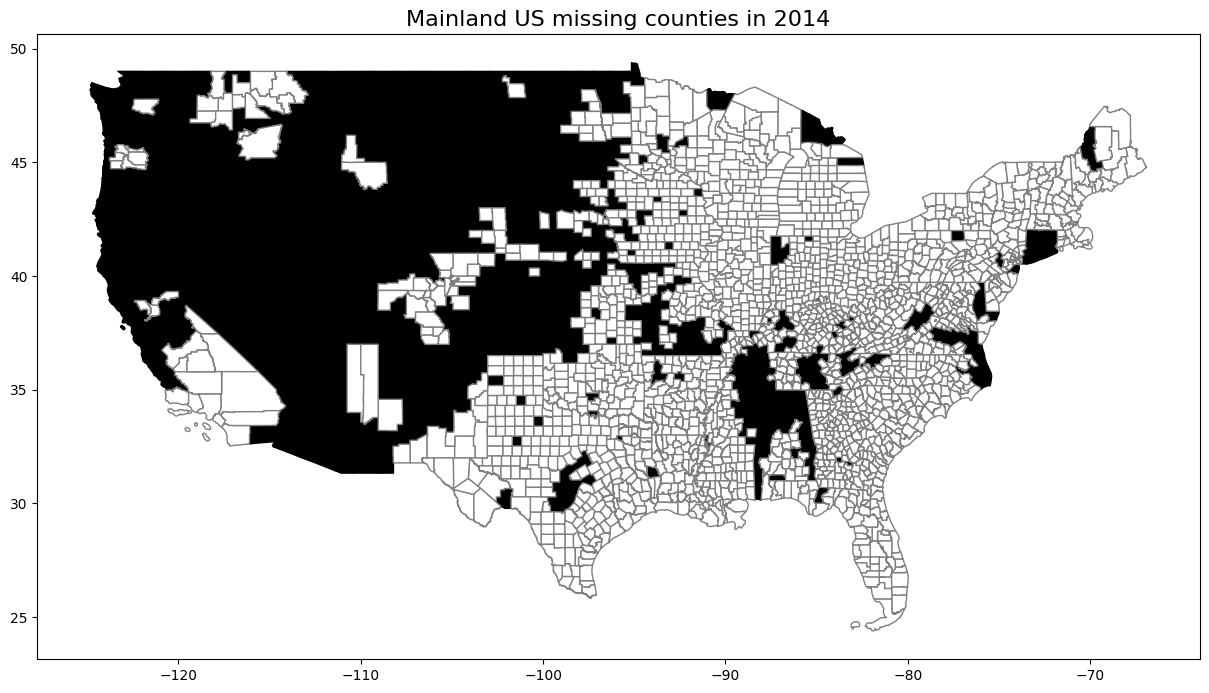

eaglei_outages_2018.csv


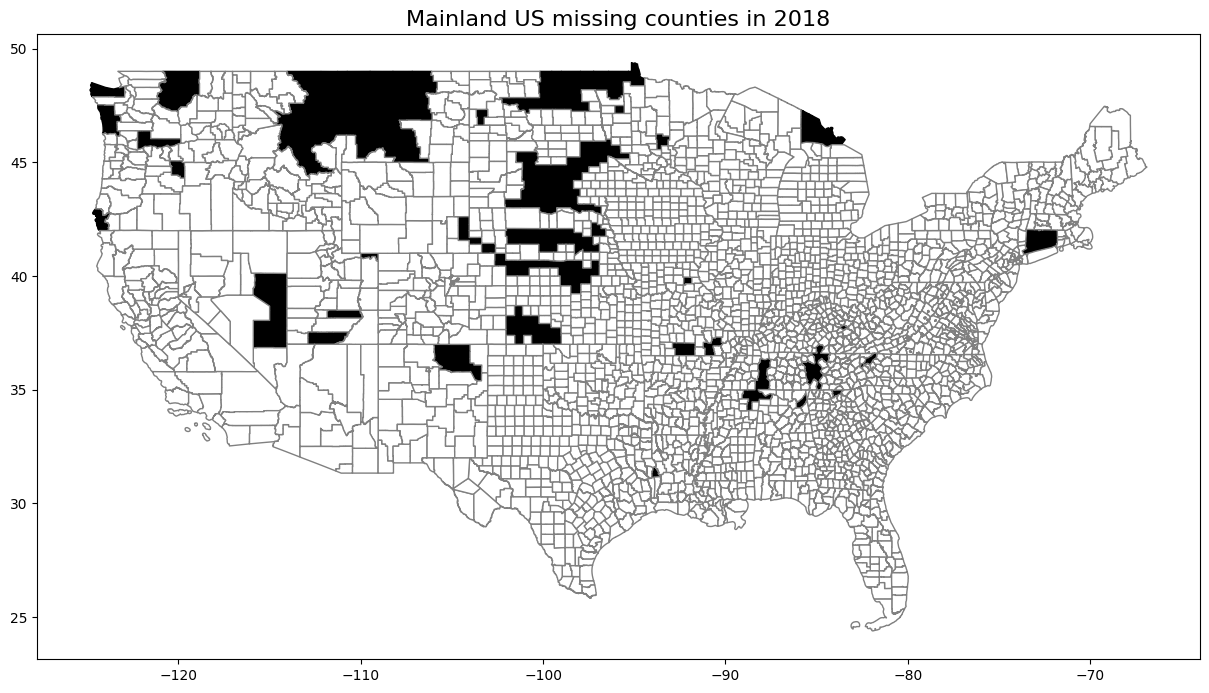

eaglei_outages_2023.csv


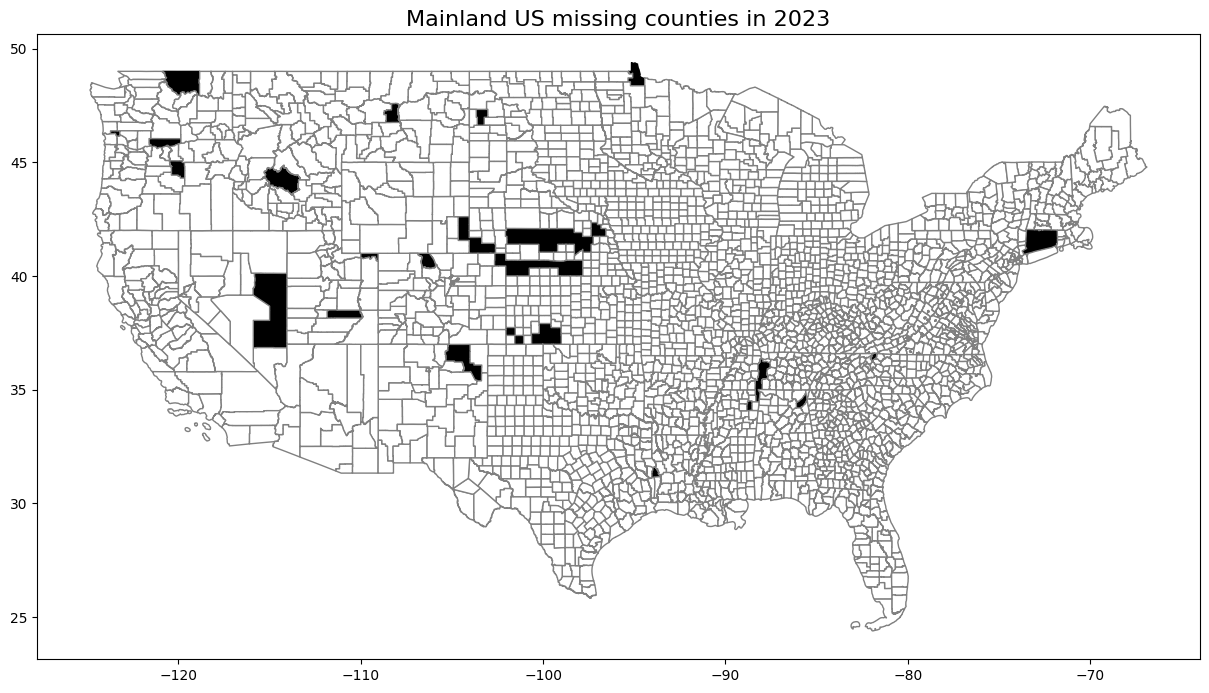

In [28]:
missingCountyMap(2014)
missingCountyMap(2018)
missingCountyMap(2023)

In [ ]:
def missingCountyMap(df):
    url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
    usa_states = gpd.read_file(url)
    shapefile_path = "../data/US_county/tl_2024_us_county.shp"
    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)


    df.loc[:, 'fips_code']  = df['fips_code'].astype(str).str.zfill(5)

    fips_codes = df.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})
    fips_codes['Data'] = df['normalized_non_nan']
    print(fips_codes['Data'])

    print(fips_codes['Data'])


    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    merged['Data'] = merged['Data'].fillna(0)

    us_bounds = box(-125, 24, -66, 50)

    mainland_us = merged[merged.geometry.intersects(us_bounds)]

    nan_counties = mainland_us[mainland_us['FIPS'].isna()]
    non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

    mainland_states = usa_states[usa_states.geometry.intersects(us_bounds)]


    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    
    mainland_us.plot(column='Data', ax=ax, cmap="Reds", legend=True, 
                      edgecolor="grey", missing_kwds={"color": "lightgrey"})

    # nan_counties.plot(ax=ax, color="black", edgecolor="black", label="No data in all years")

    mainland_states.boundary.plot(ax=ax, color='red', linewidth=1, label="State's borders")


    ax.set_title("Mainland US counties present in eaglei_outages", fontsize=16)

    plt.show()



def countyCountMAP(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_count = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"Plik {file_name} nie istnieje!")
            continue

        df_power = pd.read_csv(file_path)

        unique_fips_2 =(
            df_power[['fips_code', 'state']]
            .drop_duplicates().sort_values(by='fips_code').reset_index()
            .drop(columns=['state', 'index'])
        )

        unique_fips_2['col'] = unique_fips_2['fips_code']
        unique_fips_2 = unique_fips_2.rename(columns={'col': year})
        print(unique_fips_2.columns)

        if combined_count.empty:
            combined_count = unique_fips_2
        else:
            print(combined_count.columns)
            combined_count = pd.merge(combined_count, unique_fips_2, on='fips_code', how='outer')



    combined_count['non_nan_count'] = combined_count.drop(columns=['fips_code']).notna().sum(axis=1)
    num_columns_to_count = combined_count.drop(columns=['fips_code', 'non_nan_count']).shape[1]

    # Dodanie nowej kolumny z wynikiem dzielenia
    combined_count['normalized_non_nan'] = combined_count['non_nan_count'] / num_columns_to_count
    print(combined_count)
    df = combined_count[['fips_code','normalized_non_nan']]
    print(df['normalized_non_nan'].unique())
    missingCountyMap(df)
    

    

eaglei_outages_2014.csv
Index(['fips_code', 2014], dtype='object')
eaglei_outages_2015.csv
Index(['fips_code', 2015], dtype='object')
Index(['fips_code', 2014], dtype='object')
eaglei_outages_2016.csv
Index(['fips_code', 2016], dtype='object')
Index(['fips_code', 2014, 2015], dtype='object')
eaglei_outages_2017.csv
Index(['fips_code', 2017], dtype='object')
Index(['fips_code', 2014, 2015, 2016], dtype='object')
eaglei_outages_2018.csv
Index(['fips_code', 2018], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017], dtype='object')
eaglei_outages_2019.csv
Index(['fips_code', 2019], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018], dtype='object')
eaglei_outages_2020.csv
Index(['fips_code', 2020], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018, 2019], dtype='object')
eaglei_outages_2021.csv
Index(['fips_code', 2021], dtype='object')
Index(['fips_code', 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
eaglei_outages_2022.csv
Index(['fips_

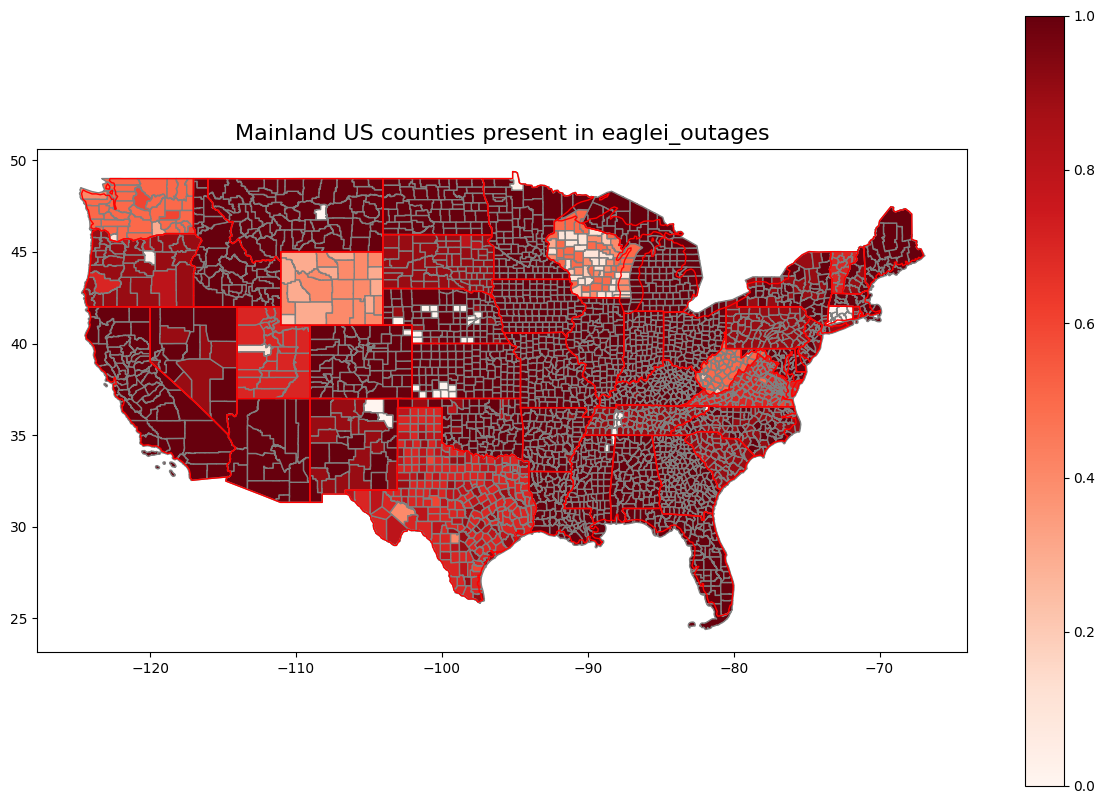

In [22]:
countyCountMAP(2014,2023)

### Eaglei_outages 2014 - missing timeline

In [ ]:
df_power = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
df_power

fips_code      county      state  customers_out       run_start_time
0             1037       Coosa    Alabama             12  2014-11-01 04:00:00
1             1051      Elmore    Alabama              7  2014-11-01 04:00:00
2             1109        Pike    Alabama              1  2014-11-01 04:00:00
3             1121   Talladega    Alabama             31  2014-11-01 04:00:00
4             4017      Navajo    Arizona              1  2014-11-01 04:00:00
...            ...         ...        ...            ...                  ...
1689455      55029        Door  Wisconsin              1  2014-12-31 00:00:00
1689456      55079   Milwaukee  Wisconsin              1  2014-12-31 00:00:00
1689457      55093      Pierce  Wisconsin              6  2014-12-31 00:00:00
1689458      55125       Vilas  Wisconsin              6  2014-12-31 00:00:00
1689459      55131  Washington  Wisconsin              1  2014-12-31 00:00:00

[1689460 rows x 5 columns]